# How much UBI spending should go to children?

While the idea of a universal basic income has been around for centuries, it was recently brought into mainstream American political discourse by 2020 Presidential candidate Andrew Yang. Yang centered his campaign around paying every adult citizen \$1,000 each month. Many other countries take the opposite approach, providing monthly payments for each child (known as a ["child allowance"](http://child-allowance.ubicenter.org)), and US lawmakers have proposed [similar policies](https://www.vox.com/future-perfect/2019/3/6/18249290/child-poverty-american-family-act-sherrod-brown-michael-bennet). Here we explore which approach is more effective at reducing poverty and inequality.

In a [July 2020 post](https://blog.ubicenter.org/20200707/adult_child_ubi.html), we found that a child allowance would be more effective at reducing poverty than an adult UBI, for spending levels up to \$500 billion, at which point a UBI for both children and adults before more effective; adult-only UBI was never the best option. But those three options--adults only, kids only, and equal for adults and kids--aren't the only ones available. In this post, we calculate the optimal ratios of adult to child UBIs, depending on the total spending and objective.

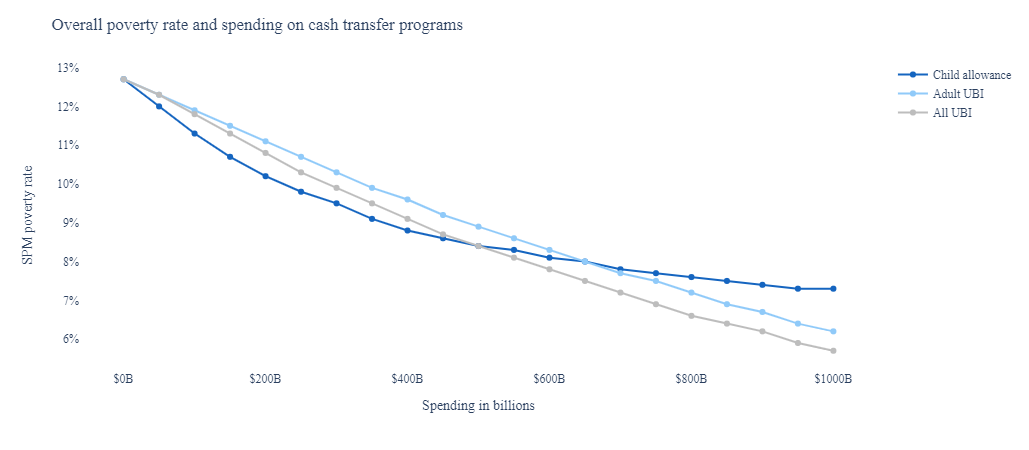

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
# import microdf as mdf

# Turn off display bar
CONFIG = {'displayModeBar': False}

# Define UBI Center colors
BLUE = '#1976D2'
DARK_BLUE = '#1565C0'
LIGHT_BLUE = '#90CAF9'
GRAY = '#BDBDBD'
BARELY_BLUE = '#E3F2FD'

july_post = pd.read_csv('https://github.com/ngpsu22/blog/raw/master/july_2020.csv')

colors = {0:DARK_BLUE,
       1: LIGHT_BLUE,
       2: GRAY}

fig = px.line(july_post, 
              x='spending_in_billions', 
              y='poverty_rate', color='ubi_type',
                 color_discrete_map={'Child allowance': DARK_BLUE,
                        'Adult UBI': LIGHT_BLUE,
                        'All UBI': GRAY})
fig.update_layout(
    title='Overall poverty rate and spending on cash transfer programs',
    xaxis_title='Spending in billions',
    yaxis_title='SPM poverty rate',
    yaxis_ticksuffix='%',
    font=dict(family='Roboto'),
    hovermode='x',
    xaxis_tickprefix='$',
    xaxis_ticksuffix='B',
    plot_bgcolor='white',
    legend_title_text='',
        
    )

fig.update_traces(mode='markers+lines', hovertemplate=None)

fig.show(config=CONFIG)

To start, we modeled how different UBI amounts (funded by a flat tax on taxable income) would impact the poverty rate if children were excluded, received half the UBI, or received the full benefit.  Our model simulated up until \$3 trillion in total UBI spending and found that including children further reduces poverty at every level.  For example, at \$1.5 trillion in spending, excluding children would give each adult about \$500 a month and reduce the overall poverty rate from 11.7 percent to 4.5 percent.  However, at the same amount of spending, including children in the full benefit would lower the poverty rate to 4 percent, lifting an additional 1.6 million people out of poverty. Poverty is generally similar between giving children a full-size UBI or half the adult amount.

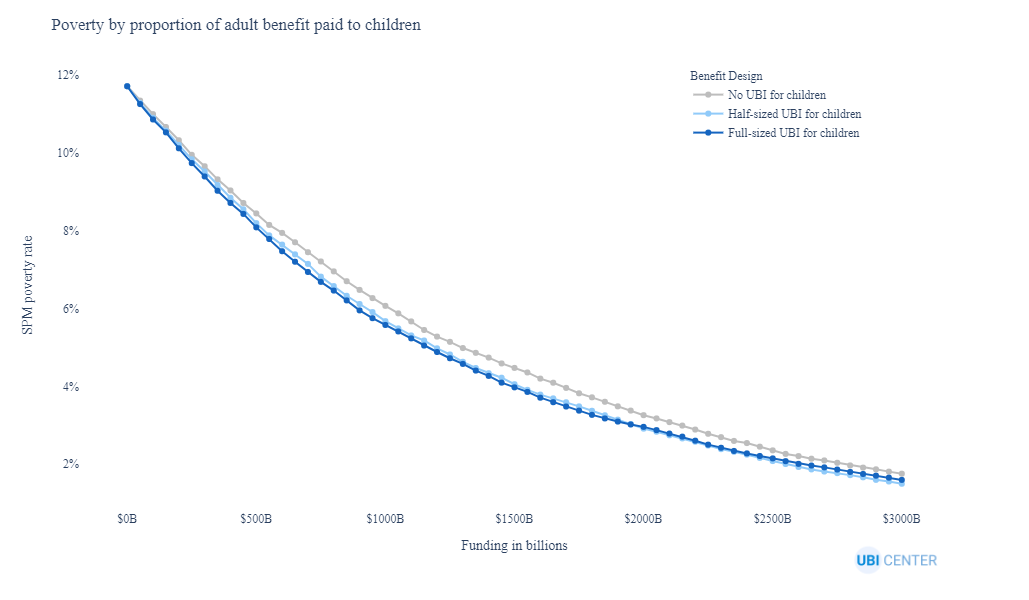

In [10]:
summary2= pd.read_csv(
    "https://github.com/ngpsu22/blog/raw/master/child_share_ubi_summary.csv.gz",
    compression='gzip'
)
# Turn off display bar
CONFIG = {'displayModeBar': False}

# Define UBI Center colors
BLUE = '#1976D2'
DARK_BLUE = '#1565C0'
LIGHT_BLUE = '#90CAF9'
GRAY = '#BDBDBD'
BARELY_BLUE = '#E3F2FD'

# Create figure
fig = px.line()

names = {0:"No UBI for children",
       1: "Half-sized UBI for children",
       2: "Full-sized UBI for children"}

colors = {0:GRAY,
       1: LIGHT_BLUE,
       2: DARK_BLUE}
       
percent_steps=[0,50,100]

zero=summary2[summary2['child_percent_ubi']==0]
fifty=summary2[summary2['child_percent_ubi']==50]
hundred=summary2[summary2['child_percent_ubi']==100]

dfs= [zero,fifty,hundred]

for i, df in enumerate(dfs):
  # add trace for optimal poverty df
  fig.add_trace(
      go.Scatter(
          x=df['funding_billions'],
          y=df['poverty_rate'],
          mode="markers+lines",
          name=names[i],
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (df['monthly_child_ubi'],
           df['monthly_adult_ubi']),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = ('<i>Poverty Rate</i>: %{y:.1f}%<br>'+\
                        '<br><b>Child UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Adult UBI/mono </b>: $%{customdata[1]: .0f}<br>'),
                          
          line=dict(
              color=colors[i]
          )
      )
  )


fig.update_layout(
        title='Poverty by proportion of adult benefit paid to children',
        xaxis_title='Funding in billions',
        yaxis_title='SPM poverty rate',
        yaxis_ticksuffix='%',
        font=dict(family='Roboto'),
        hovermode='x',
        xaxis_tickprefix='$',
        xaxis_ticksuffix='B',
        plot_bgcolor='white',
        height=600,
        width=1000,
        legend_title_text='Benefit Design',
        margin_b=90 # add bottom margin for caption
        
    )

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.7
))

fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/UBICenter/blog/master/jb/_static/ubi_center_logo_wide_blue.png",
        # See https://github.com/plotly/plotly.py/issues/2975.
        # source="../_static/ubi_center_logo_wide_blue.png",
        xref="paper", yref="paper",
        x=1, y=-0.15,
        sizex=0.12, sizey=0.12,
        xanchor="right", yanchor="bottom"
        )
    )


fig.update_traces(
  mode='markers+lines'
  )

fig.show(config=CONFIG)

Still, the results above only model three scenarios. In our next simulation, we examined the optimal share of spending that should go to children in order to minimize poverty or reduce inequality.  For each spending level, we simulated 101 scenarios that range from 0 percent of the overall funding going to children to 100 percent. As a benchmark, we show a line at 22%, which corresponds to equal UBI levels for adults and children (since children comprise 22% of the US population). 

The simplest case is inequality reduction, for which optimal policy would give vast majorities of funds to children. In fact, an annual child allowance should reach over \$17,000 per child before any spending goes towards adults.  Even at \$3 trillion in new spending, over half of the money would go towards children, resulting in approximately \$1,743 a month for kids and $648 per adult. This is, to some degree, by construction, as our inequality metric considers per-capita resources; other inequality measures may produce different results.

If the goal is to minimize the poverty rate, the story is a bit more complicated. For spending levels below \$1 trillion, children should receive more than adults; for spending levels above \$2 trillion, children should receive less; for spending levels in between, it varies. Because many people have incomes just below or above their poverty threshold, the poverty rate is inherently volatile with respect to transfer policy.

Finally, we examined the effect of UBI design on the  poverty gap, the summation of the distance poor families are from their poverty threshold.  The 2019 poverty gap is \$153 billion. To optimize its reduction, adults should receive more than children at every level above \$150 billion in new spending.  With \$2 trillion in funding, the poverty gap could be reduced to \$45 billion by sending every adult \$628 per month and parents \$114 per month per child.

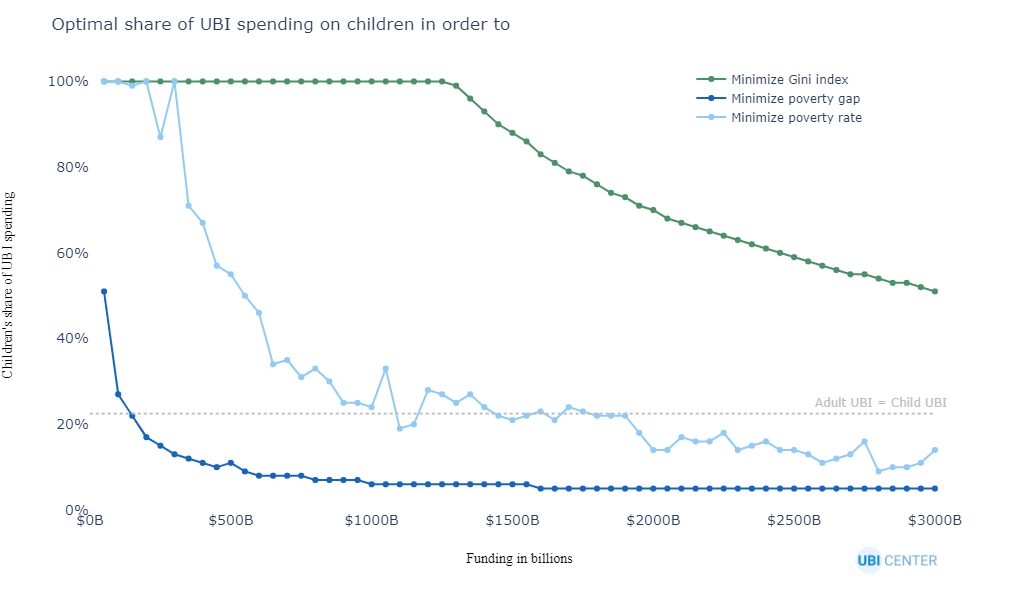

In [11]:
summary = pd.read_csv(
"https://github.com/ngpsu22/blog/raw/master/children_share_funding_summary%20(4).csv.gz",
   compression='gzip')

optimal_poverty_gap = summary.sort_values('poverty_gap').drop_duplicates('funding_billions', keep='first')
# Drop rows where funding level is 0
optimal_poverty_gap = optimal_poverty_gap.drop(
    optimal_poverty_gap[optimal_poverty_gap.funding_billions==0].index
    ) 

optimal_poverty_rate = summary.sort_values('poverty_rate').drop_duplicates('funding_billions', keep='first')
# Drop rows where funding level is 0
optimal_poverty_rate = optimal_poverty_rate.drop(
    optimal_poverty_rate[optimal_poverty_rate.funding_billions==0].index
    ) 

optimal_inequality = summary.sort_values('gini').drop_duplicates('funding_billions', keep='first')
# Drop rows where funding level is 0
optimal_inequality = optimal_inequality.drop(
    optimal_inequality[optimal_inequality.funding_billions==0].index
    ) 

optimal_winners = summary.sort_values('percent_better_off').drop_duplicates('funding_billions', keep='last')
optimal_winners = optimal_winners.drop(
    optimal_winners[optimal_winners.funding_billions==0].index
    ) 

# Define adult population size, as determined in data preprocessing
adult_pop = 252117111.14000002
# Define child population size
child_pop = 73151070.56999998
# Calculate total population
pop = child_pop+adult_pop

# Create figure
fig = px.line()

names = {0:"minimize poverty",
       1: "minimize inequality",
       2: "maximize winners"}

colors = {0:"blue",
       1: "black",
       2: "orange"}

# Add inequality trace
fig.add_trace(
      go.Scatter(
          x=optimal_inequality['funding_billions'],
          y=optimal_inequality['child_percent_funding'],
          mode="markers+lines",
          name="Minimize Gini index",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_inequality['monthly_child_ubi'],
           optimal_inequality['monthly_adult_ubi'],
           optimal_inequality['gini']),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = ('<i>Children\'s Share of Spending</i>: %{y:.0f}%<br>'+\
                        '<br><b>Child UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Adult UBI/mo </b>: $%{customdata[1]: .0f}<br>'
                        '<br><b>Gini </b>: %{customdata[2]: .3f}<br>'
                          ),
          line=dict(
              color='#499167'
          )
      )
  )

# Add poverty gap trace
fig.add_trace(
      go.Scatter(
          x=optimal_poverty_gap['funding_billions'],
          y=optimal_poverty_gap['child_percent_funding'],
          mode="markers+lines",
          name="Minimize poverty gap",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_poverty_gap['monthly_child_ubi'],
           optimal_poverty_gap['monthly_adult_ubi'],
           optimal_poverty_gap['poverty_gap']/1e9),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = ('<i>Children\'s Share of Spending</i>: %{y:.0f}%<br>'+\
                        '<br><b>Child UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Adult UBI/mo </b>: $%{customdata[1]: .0f}<br>'
                        '<br><b>Poverty Gap </b>: $%{customdata[2]: .0f} billion<br>'
                          ),
          line=dict(
              color=DARK_BLUE
          )
      )
  )

# Add poverty gap trace
fig.add_trace(
      go.Scatter(
          x=optimal_poverty_rate['funding_billions'],
          y=optimal_poverty_rate['child_percent_funding'],
          mode="markers+lines",
          name="Minimize poverty rate",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_poverty_rate['monthly_child_ubi'],
           optimal_poverty_rate['monthly_adult_ubi'],
           optimal_poverty_rate['poverty_rate']),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = ('<i>Children\'s Share of Spending</i>: %{y:.0f}%<br>'+\
                        '<br><b>Child UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Adult UBI/mo </b>: $%{customdata[1]: .0f}<br>'
                        '<br><b>Poverty rate </b>: %%{customdata[2]: .0f}%<br>'
                          ),
          line=dict(
              color=LIGHT_BLUE
          )
      )
  )


ratio = (child_pop / pop) * 100

fig.add_shape(
    type="line", line=dict(dash="dot", color=GRAY),
    x0=-1, x1=3000, y0=ratio, y1=ratio
)

# plot line where adult benefit is same size as child benefit
fig.add_annotation(
    text="Adult UBI = Child UBI",
    xref="paper",
    yref="paper",
    x=1,
    y=0.22,
    showarrow=False,
    font=dict(
              color=GRAY,
              size=12
            ))

fig.update_xaxes(
        tickangle = 0,
        title_text = "Funding in billions",
        tickfont = {"size": 14},
        title_standoff = 25,
        ticksuffix='B',
        tickprefix='$',
        range=[0,3050])

fig.update_yaxes(
        title_text = "Children\'s share of UBI spending",
        ticksuffix ="%",
        tickfont = {'size':14},
        title_standoff = 25,
        range=[0,105])

fig.update_xaxes(title_font=dict(size=14, family='Roboto', color='black'))
fig.update_yaxes(title_font=dict(size=14, family='Roboto', color='black'))
fig.update_layout(
    title_text='Optimal share of UBI spending on children in order to',
    hoverlabel_align = 'right',
    margin_b=90)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.7,
    
))

fig.update_layout(plot_bgcolor='white', height=600, width=1000, hovermode="x")

fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/UBICenter/blog/master/jb/_static/ubi_center_logo_wide_blue.png",
        # See https://github.com/plotly/plotly.py/issues/2975.
        # source="../_static/ubi_center_logo_wide_blue.png",
        xref="paper", yref="paper",
        x=1, y=-0.15,
        sizex=0.12, sizey=0.12,
        xanchor="right", yanchor="bottom"
        )
    )
    
fig.update_traces(
    mode='markers+lines',
    #  hovertemplate=None
     )

fig.show(config=CONFIG)

The next chart shows the monthly amount given to children and adults under each optimization.  Because the poverty gap is less volatile to changes at the margin, the UBI amounts increases are nearly linear. At the highest level of spending in our model, \$3 trillion, adults would receive \$942 per month and children would receive \$171 while optimizing for poverty gap reduction. Poverty rate amounts are much more erratic, while inequality amounts appear semi logarithmic and exponential for adults and children respectively.

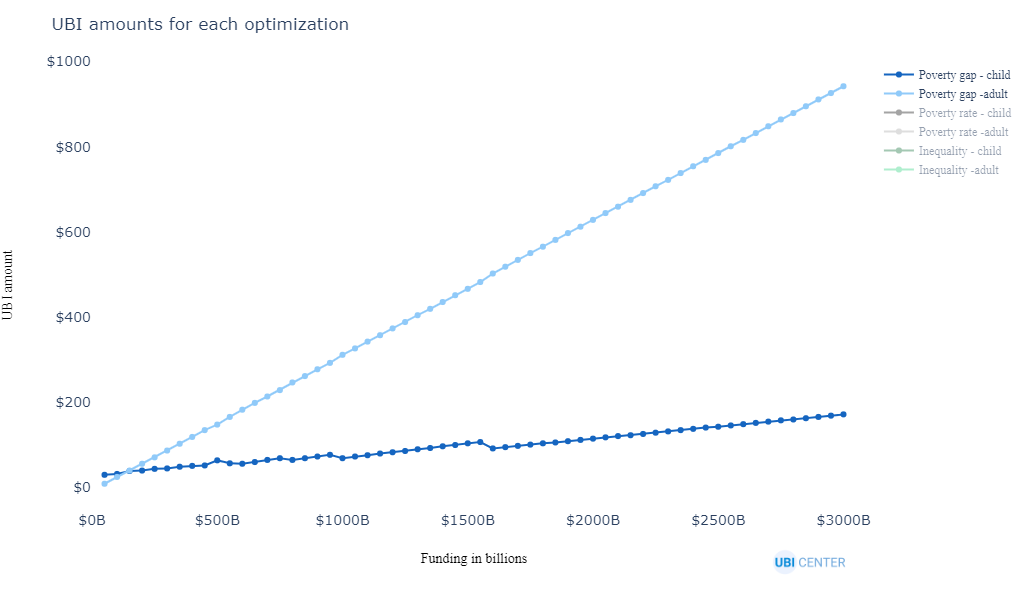

In [12]:
# Create UBI amount figure
fig = px.line()

names = {0:"minimize poverty",
       1: "minimize inequality",
       2: "maximize winners"}

colors = {0:"blue",
       1: "black",
       2: "orange"}

fig.add_trace(
      go.Scatter(
          x=optimal_poverty_gap['funding_billions'],
          y=optimal_poverty_gap['monthly_child_ubi'],
          mode="markers+lines",
          name="Poverty gap - child",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_poverty_gap['monthly_child_ubi'],
           optimal_poverty_gap['poverty_gap']/1e9),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = (
                        '<b>Child UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Poverty Gap </b>: $%{customdata[1]: .0f} billion<br>'
                          ),
          line=dict(
              color=DARK_BLUE
          )
      )
  )

fig.add_trace(
      go.Scatter(
          x=optimal_poverty_gap['funding_billions'],
          y=optimal_poverty_gap['monthly_adult_ubi'],
          mode="markers+lines",
          name="Poverty gap -adult",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_poverty_gap['monthly_adult_ubi'],
           optimal_poverty_gap['poverty_gap']/1e9),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = (
                        '<b>Adult UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Poverty gap </b>: %{customdata[1]: .0f} billion'
                          ),
          line=dict(
              color=LIGHT_BLUE
          )
      )
  )

fig.add_trace(
      go.Scatter(
          x=optimal_poverty_rate['funding_billions'],
          y=optimal_poverty_rate['monthly_child_ubi'],
          mode="markers+lines",
          name="Poverty rate - child",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_poverty_rate['monthly_child_ubi'],
           optimal_poverty_rate['poverty_rate']),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = (
                        '<b>Child UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Poverty rate </b>: %{customdata[1]: .0f}%<br>'
                          ),
          line=dict(
              color='#484848'
          )
      )
  )

fig.add_trace(
      go.Scatter(
          x=optimal_poverty_rate['funding_billions'],
          y=optimal_poverty_rate['monthly_adult_ubi'],
          mode="markers+lines",
          name="Poverty rate -adult",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_poverty_rate['monthly_adult_ubi'],
           optimal_poverty_rate['poverty_rate']),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = (
                        '<b>Adult UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Poverty rate </b>: %{customdata[1]: .0f}%'
                          ),
          line=dict(
              color=GRAY
          )
      )
  )


fig.add_trace(
      go.Scatter(
          x=optimal_inequality['funding_billions'],
          y=optimal_inequality['monthly_child_ubi'],
          mode="markers+lines",
          name="Inequality - child",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_inequality['monthly_child_ubi'],
           optimal_inequality['gini']),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = (
                        '<b>Child UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Gini </b>: %{customdata[1]: .3f}<br>'
                          ),
          line=dict(
              color='#499167'
          )
      )
  )

fig.add_trace(
      go.Scatter(
          x=optimal_inequality['funding_billions'],
          y=optimal_inequality['monthly_adult_ubi'],
          mode="markers+lines",
          name="Inequality -adult",
          # assign numpy array with child & adult ubi to customdata argument
          customdata = np.stack(
          (optimal_inequality['monthly_adult_ubi'],
           optimal_inequality['gini']),
          axis=-1),
          # add customdata to hovertemplate
          hovertemplate = (
                        '<b>Adult UBI/mo</b>: $%{customdata[0]: .0f}'+\
                        '<br><b>Gini </b>: %{customdata[1]: .3f}<br>'
                          ),
          line=dict(
              color='#5FDD9D'
          )
      )
  )

fig.update_xaxes(
        tickangle = 0,
        title_text = "Funding in billions",
        tickfont = {"size": 14},
        title_standoff = 25,
        ticksuffix='B',
        tickprefix='$',
        range=[0,3050])

fig.update_yaxes(
        title_text = "UBI amount",
        tickprefix ="$",
        tickfont = {'size':14},
        title_standoff = 25)

fig.update_xaxes(title_font=dict(size=14, family='Roboto', color='black'))
fig.update_yaxes(title_font=dict(size=14, family='Roboto', color='black'))
fig.update_layout(
    title_text='UBI amounts for each optimization',
    hoverlabel_align = 'right', # new
    margin_b=90) 

fig.update_layout(legend=dict(
    yanchor="top",
    y=1,
    xanchor="left",
    x=1.03,
    font=dict(family='Roboto'),
))

fig.update_layout(plot_bgcolor='white', height=600, width=1000, hovermode="x")
fig.update_traces(
    mode='markers+lines',
    #  hovertemplate=None
     )

hide_line = ['Poverty rate - child', 'Poverty rate -adult',
             'Inequality - child', 'Inequality -adult']
fig.for_each_trace(lambda trace: trace.update(visible="legendonly")
                   if trace.name in hide_line else ())

fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/UBICenter/blog/master/jb/_static/ubi_center_logo_wide_blue.png",
        # See https://github.com/plotly/plotly.py/issues/2975.
        # source="../_static/ubi_center_logo_wide_blue.png",
        xref="paper", yref="paper",
        x=1, y=-0.15,
        sizex=0.12, sizey=0.12,
        xanchor="right", yanchor="bottom"
        )
    )

fig.show(config=CONFIG)

Our research shows that different policy objectives and funding levels may lead to starkly different amounts of cash transfer funding going towards children. Yet, in all of our optimizations children were included in some capacity and often received a larger monthly amount than adults.  These results underline the importance of including children in UBI conversations and policy analysis.